### Questions to answer

    1- what is the most expensive app on the store
    2- which genre has more apps
    3- what is the avg size of free app & paid app
    4- what is the top 5 rated apps
    5- how many apps have more than 50K reviews
    6- what is the average price of the app for each genre with each installs number
    7- how many apps have more than 4.7 > rating and what thier avg prive is 
    8- how much google earned from the 5,000,000+ installed apps 
    9- what is the max and min size of the free apps and paid apps 
    10 - is there a correlation between the rating and the reviews and the size with the price of the app 
    11 - how many apps for each type for each content type 
    12 - how many apps that can work on android 4 or more
    



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize': (12, 8)},font_scale=1.2)

In [2]:
# let's load dthe data
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df2 = pd.read_csv('googleplaystore_user_reviews.csv')
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Clean The Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


**fix Reviews**

In [5]:
df.Reviews

0           159
1           967
2         87510
3        215644
4           967
          ...  
10836        38
10837         4
10838         3
10839       114
10840    398307
Name: Reviews, Length: 10841, dtype: object

In [6]:
# convert the Reviews col to numeric value 
df['Reviews'] = pd.to_numeric(df['Reviews'], errors = 'coerce')

In [7]:
df['Reviews']

0           159.0
1           967.0
2         87510.0
3        215644.0
4           967.0
           ...   
10836        38.0
10837         4.0
10838         3.0
10839       114.0
10840    398307.0
Name: Reviews, Length: 10841, dtype: float64

**work on the size column**

In [8]:
df.Size

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [9]:
def fix_size(s):
    try:
        if s.endswith('M'):
            return float(s[:-1])

        elif s.endswith('k'):
            return float(s[:-1]) / 1024
        
        elif s.endswith('1,000+'):
            return 1.0
        else:
            return np.nan

    except:
        return np.nan



In [10]:
df['Size'] = df['Size'].apply(fix_size)

In [11]:

df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


**work on the price column**

In [12]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [13]:
# create a function that clean the price column
def fix_price(s):
    try:
        if s.startswith("$"):
            return float(s[1:])
            
        elif s == '0' or s == 'Everyone':
            return 0.0

        else:
            return np.nan

    except:
        return np.nan

In [14]:
fix_price('$0.99')

0.99

In [15]:
# now let's apply the function to the Price column
df['Price'] = df['Price'].apply(fix_price)
df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [18]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [19]:
len(df['Last Updated'].unique())

1378

**univariate analysis**

In [20]:
# let's make univariate analysis of the data
df.describe()

,Rating,Reviews,Size,Price
count,9367.000000,1.084000e+04,9146.000000,10841.000000
mean,4.193338,4.441529e+05,21.513922,1.027273
std,0.537431,2.927761e+06,22.588868,15.948971
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,19.000000,7.815831e+07,100.000000,400.000000


as we can we have a problem in the rating column, we have rating = 19 !!

In [21]:
# let's see the values in the rating coulmn that is  > 5
df[df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,1.0,Free,0,0.0,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


As we can see this is invaild record so let's delete it 

In [22]:
# let's drop the record that has rating = 19
df = df[df['Rating'] != 19]

In [23]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


Now we are taking :)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.2+ MB


**univariate analysis for categorical columns**

In [25]:
df['Category']

0             ART_AND_DESIGN
1             ART_AND_DESIGN
2             ART_AND_DESIGN
3             ART_AND_DESIGN
4             ART_AND_DESIGN
                ...         
10836                 FAMILY
10837                 FAMILY
10838                MEDICAL
10839    BOOKS_AND_REFERENCE
10840              LIFESTYLE
Name: Category, Length: 10840, dtype: object

In [26]:
# see the unique valuse
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [27]:
len(df['Category'].unique())

33

In [28]:
df['Category'] = df['Category'].str.title()


<ipython-input-28-5434648dfac8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = df['Category'].str.title()


In [29]:
df['Category'].unique()

array(['Art_And_Design', 'Auto_And_Vehicles', 'Beauty',
       'Books_And_Reference', 'Business', 'Comics', 'Communication',
       'Dating', 'Education', 'Entertainment', 'Events', 'Finance',
       'Food_And_Drink', 'Health_And_Fitness', 'House_And_Home',
       'Libraries_And_Demo', 'Lifestyle', 'Game', 'Family', 'Medical',
       'Social', 'Shopping', 'Photography', 'Sports', 'Travel_And_Local',
       'Tools', 'Personalization', 'Productivity', 'Parenting', 'Weather',
       'Video_Players', 'News_And_Magazines', 'Maps_And_Navigation'],
      dtype=object)

So there is no problem with the Category coulumn

In [30]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [31]:
df['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [32]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [33]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [34]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [35]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [36]:
# let's drop the columns that we are'nt use
df = df.drop(['Current Ver','Genres'],axis=1)

In [37]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,"January 20, 2017",2.2 and up
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",Varies with device


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Last Updated    10840 non-null  object 
 10  Android Ver     10838 non-null  object 
dtypes: float64(4), object(7)
memory usage: 1016.2+ KB


In [39]:
# let's create a column that check for the version if it's 4 or more we put yes else we put no

def version(s):
    try:
        if s.startswith('4'):
            return 'Yes'
        else:
            return 'No'
    except:
        return np.nan


In [40]:
df['Version'] = df['Android Ver'].apply(version)

In [41]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,"January 7, 2018",4.0.3 and up,Yes
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,"January 15, 2018",4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,"August 1, 2018",4.0.3 and up,Yes
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,"June 8, 2018",4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,"June 20, 2018",4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,"July 25, 2017",4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,"July 6, 2018",4.1 and up,Yes
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,"January 20, 2017",2.2 and up,No
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,"January 19, 2015",Varies with device,No


In [42]:
# let's convert the Last Updated column to datetime format
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,"10,000+",Free,0.0,Everyone,2018-01-07,4.0.3 and up,Yes
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,"500,000+",Free,0.0,Everyone,2018-01-15,4.0.3 and up,Yes
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,"5,000,000+",Free,0.0,Everyone,2018-08-01,4.0.3 and up,Yes
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,"50,000,000+",Free,0.0,Teen,2018-06-08,4.2 and up,Yes
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,"100,000+",Free,0.0,Everyone,2018-06-20,4.4 and up,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,"5,000+",Free,0.0,Everyone,2017-07-25,4.1 and up,Yes
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,100+,Free,0.0,Everyone,2018-07-06,4.1 and up,Yes
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,"1,000+",Free,0.0,Everyone,2017-01-20,2.2 and up,No
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,"1,000+",Free,0.0,Mature 17+,2015-01-19,Varies with device,No


In [43]:
# now let's check for the missing values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Last Updated         0
Android Ver          2
Version              2
dtype: int64

In [44]:
# let's the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

App                0.000000
Category           0.000000
Rating            13.597786
Reviews            0.000000
Size              15.636531
Installs           0.000000
Type               0.009225
Price              0.000000
Content Rating     0.000000
Last Updated       0.000000
Android Ver        0.018450
Version            0.018450
dtype: float64

In [45]:
df['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1375
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
4.1 - 7.1.1              1
5.0 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 6.0                1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [46]:
# let's fill the type column and version column and Android Ver with the most common value
df['Type'] = df['Type'].fillna('Free')
df['Version'] = df['Version'].fillna('No')
df['Android Ver'] = df['Android Ver'].fillna('4.1 and up')


In [47]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Last Updated         0
Android Ver          0
Version              0
dtype: int64

In [ ]:
# we can make the same thing useing sklearn simple imputer
from sklearn.impute import SimpleImputer 
im = SimpleImputer(strategy = 'most_frequent')
df['Type'] = im.fit_transforme(df['Type'])

In [ ]:
# let's fill the missing value in the rating with the mean value
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [ ]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

In [ ]:
# check for null values
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Last Updated      0
Android Ver       0
Version           0
dtype: int64

In [49]:
df.describe()

,Rating,Reviews,Size,Price
count,9366.000000,1.084000e+04,9145.000000,10840.000000
mean,4.191757,4.441529e+05,21.516165,1.027368
std,0.515219,2.927761e+06,22.589084,15.949703
min,1.000000,0.000000e+00,0.008301,0.000000
25%,4.000000,3.800000e+01,4.900000,0.000000
50%,4.300000,2.094000e+03,13.000000,0.000000
75%,4.500000,5.477550e+04,30.000000,0.000000
max,5.000000,7.815831e+07,100.000000,400.000000


**Now let's start answering questions**

In [53]:
# what is the most expensive app on the store
df[df['Price'] == df['Price'].max()]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7.3,"10,000+",Paid,400.0,Everyone,2018-05-03,4.1 and up,Yes


In [54]:
# which genre has more apps
df['Category'].value_counts()

Family                 1972
Game                   1144
Tools                   843
Medical                 463
Business                460
Productivity            424
Personalization         392
Communication           387
Sports                  384
Lifestyle               382
Finance                 366
Health_And_Fitness      341
Photography             335
Social                  295
News_And_Magazines      283
Shopping                260
Travel_And_Local        258
Dating                  234
Books_And_Reference     231
Video_Players           175
Education               156
Entertainment           149
Maps_And_Navigation     137
Food_And_Drink          127
House_And_Home           88
Auto_And_Vehicles        85
Libraries_And_Demo       85
Weather                  82
Art_And_Design           65
Events                   64
Comics                   60
Parenting                60
Beauty                   53
Name: Category, dtype: int64

<AxesSubplot:>

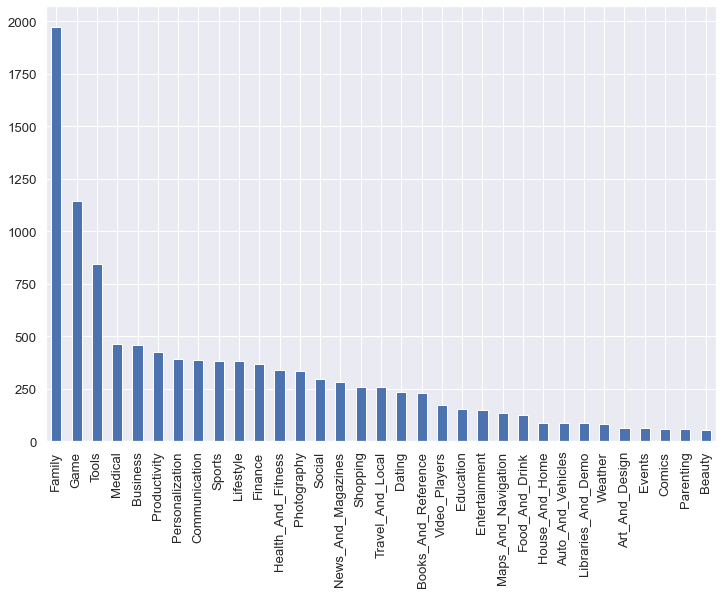

In [55]:
# which genre has more apps in a his plot 
df['Category'].value_counts().plot(kind='bar')


In [56]:
# what is the avg size of free app & paid app
df[df['Type'] == 'Free']['Size'].mean()


21.706139332193974

In [57]:
df[df['Type'] == 'Paid']['Size'].mean()


19.306538112914346

In [60]:
# we can also use group by
df.groupby('Type')['Size'].mean()

Type
Free    21.706139
Paid    19.306538
Name: Size, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='Size'>

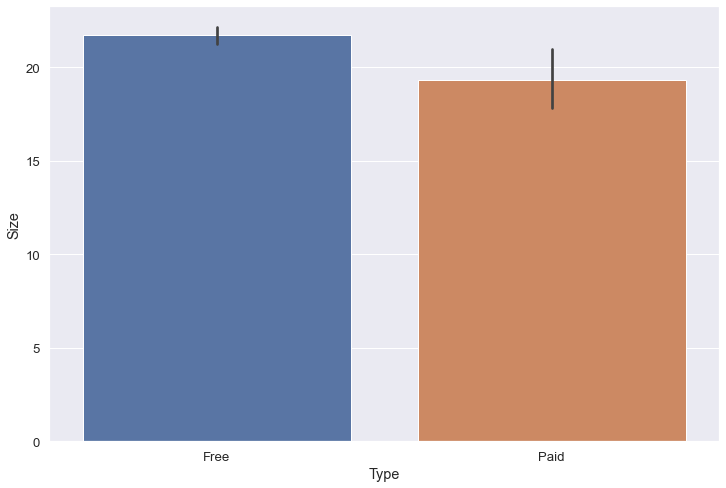

In [82]:
sns.barplot(x='Type',y='Size',data=df)


In [67]:
# what is the top 5 rated apps with bar plot
df.sort_values(by='Rating',ascending=False).head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
9056,Santa's Monster Shootout DX,Game,5.0,4.0,33.0,50+,Paid,1.99,Teen,2013-08-15,2.2 and up,No
8395,DG TV,News_And_Magazines,5.0,3.0,5.7,100+,Free,0.00,Everyone,2018-05-26,4.1 and up,Yes
8493,PK and DK Audio App,Family,5.0,2.0,3.9,100+,Free,0.00,Everyone,2017-10-25,4.1 and up,Yes
6330,HON. B.J. ACS COLLEGE ALE,Family,5.0,3.0,1.8,100+,Free,0.00,Mature 17+,2016-12-26,4.3 and up,Yes
6342,BJ Foods,Business,5.0,3.0,1.5,10+,Free,0.00,Everyone,2018-02-07,4.1 and up,Yes


In [70]:
# what is the top 5 expensive apps that has rating = 5 
df[df['Rating'] == 5].sort_values(by='Price',ascending=False).head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
5489,AP Art History Flashcards,Family,5.0,1.0,96.000000,10+,Paid,29.99,Mature 17+,2016-01-19,4.0 and up,Yes
7477,USMLE Step 2 CK Flashcards,Family,5.0,1.0,40.000000,10+,Paid,19.99,Everyone,2014-05-26,2.2 and up,No
5246,Hey AJ! It's Bedtime!,Family,5.0,1.0,63.000000,10+,Paid,4.99,Everyone,2018-04-04,2.3 and up,No
7204,TI-84 CE Graphing Calculator Manual TI 84,Family,5.0,1.0,27.000000,100+,Paid,4.99,Everyone,2018-03-28,4.1 and up,Yes
5482,meStudying: AP English Lit,Family,5.0,1.0,0.639648,10+,Paid,4.99,Everyone,2013-08-31,2.0.1 and up,No


In [80]:
#  how many apps have more than 50K reviews
df[df['Reviews'] > 50000].sort_values(by='Reviews',ascending=False).head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver,Version
2544,Facebook,Social,4.1,78158306.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-08-03,Varies with device,No
3943,Facebook,Social,4.1,78128208.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-08-03,Varies with device,No
336,WhatsApp Messenger,Communication,4.4,69119316.0,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,No
381,WhatsApp Messenger,Communication,4.4,69119316.0,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,No
3904,WhatsApp Messenger,Communication,4.4,69109672.0,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-03,Varies with device,No
2604,Instagram,Social,4.5,66577446.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,No
2545,Instagram,Social,4.5,66577313.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,No
2611,Instagram,Social,4.5,66577313.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,No
3909,Instagram,Social,4.5,66509917.0,NaN,"1,000,000,000+",Free,0.0,Teen,2018-07-31,Varies with device,No
382,Messenger – Text and Video Chat for Free,Communication,4.0,56646578.0,NaN,"1,000,000,000+",Free,0.0,Everyone,2018-08-01,Varies with device,No


In [93]:
# what is the average price of the app for each genre with each installs number pivot table 
x = df.pivot_table(index='Category',columns='Installs',values='Price',aggfunc='mean')
x

Installs,0,0+,1+,"1,000+","1,000,000+","1,000,000,000+",10+,"10,000+","10,000,000+",100+,...,"100,000,000+",5+,"5,000+","5,000,000+",50+,"50,000+","50,000,000+",500+,"500,000+","500,000,000+"
Category,,,,,,,,,,,,,,,,,,,,,
Art_And_Design,NaN,0.000,NaN,0.663333,0.000000,NaN,NaN,0.180909,0.000000,0.000000,...,NaN,NaN,0.398000,0.0,NaN,0.000000,0.0,NaN,0.000000,NaN
Auto_And_Vehicles,NaN,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.248333,...,NaN,0.000000,0.000000,0.0,9.990000,0.398000,NaN,0.000000,0.000000,NaN
Beauty,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,NaN
Books_And_Reference,NaN,NaN,5.990000,0.149118,0.000000,0.0,3.996842,0.179600,0.000000,0.570000,...,0.0,1.852857,0.474375,0.0,0.583333,0.000000,NaN,0.220000,0.000000,NaN
Business,NaN,0.000,0.000000,0.183265,0.000000,NaN,2.201905,0.065000,0.000000,0.432763,...,0.0,0.055000,0.000000,0.0,0.359600,0.000000,0.0,0.782174,0.000000,NaN
Comics,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.000000,NaN
Communication,NaN,NaN,0.000000,0.294091,0.066444,0.0,1.392105,0.478400,0.000000,0.210606,...,0.0,0.000000,0.393158,0.0,0.000000,0.000000,0.0,0.906364,0.000000,0.0
Dating,NaN,NaN,0.000000,0.411176,0.000000,NaN,0.000000,0.295556,0.000000,0.787895,...,NaN,0.000000,0.000000,0.0,0.248333,0.000000,NaN,0.000000,0.000000,NaN
Education,NaN,NaN,NaN,4.990000,0.000000,NaN,NaN,0.000000,0.000000,NaN,...,0.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.285000,NaN


In [94]:
x.loc['Medical']

Installs
0                        NaN
0+                200.000000
1+                  1.138571
1,000+              8.277308
1,000,000+          0.000000
1,000,000,000+           NaN
10+                 0.343793
10,000+             2.511765
10,000,000+              NaN
100+                2.553651
100,000+            1.754151
100,000,000+             NaN
5+                  0.000000
5,000+              1.899444
5,000,000+          0.000000
50+                 0.690769
50,000+             1.032000
50,000,000+              NaN
500+                1.497391
500,000+            0.000000
500,000,000+             NaN
Name: Medical, dtype: float64

In [95]:
x['1,000,000+']

Category
Art_And_Design         0.000000
Auto_And_Vehicles      0.000000
Beauty                 0.000000
Books_And_Reference    0.000000
Business               0.000000
Comics                 0.000000
Communication          0.066444
Dating                 0.000000
Education              0.000000
Entertainment          0.000000
Events                 0.000000
Family                 0.036182
Finance                0.000000
Food_And_Drink         0.000000
Game                   0.120000
Health_And_Fitness     0.000000
House_And_Home         0.000000
Libraries_And_Demo     0.000000
Lifestyle              0.130217
Maps_And_Navigation    0.000000
Medical                0.000000
News_And_Magazines     0.000000
Parenting              0.000000
Personalization        0.148085
Photography            0.332778
Productivity           0.000000
Shopping               0.000000
Social                 0.000000
Sports                 0.037547
Tools                  0.029604
Travel_And_Local       0.000000

In [98]:
# how many apps have more than 4.7 > rating and what thier avg prive is 
df[df['Rating'] > 4.7]['Price'].mean()

0.5018487394957988

In [101]:
# how much google earned from the 5,000,000+ installed apps
df.groupby('Installs')['Price'].sum()

Installs
0                    0.00
0+                1205.41
1+                 179.29
1,000+            2662.56
1,000,000+          68.76
1,000,000,000+       0.00
10+                447.76
10,000+           2462.80
10,000,000+         14.97
100+               837.76
100,000+           861.45
100,000,000+         0.00
5+                  71.38
5,000+            1437.96
5,000,000+           0.00
50+                109.72
50,000+            603.85
50,000,000+          0.00
500+               134.62
500,000+            38.38
500,000,000+         0.00
Name: Price, dtype: float64

In [103]:
# what is the max and min size of the free apps and paid apps 
df.groupby('Type')['Size'].max()


Type
Free    100.0
Paid    100.0
Name: Size, dtype: float64

In [104]:
df.groupby('Type')['Size'].min()


Type
Free    0.008301
Paid    0.013672
Name: Size, dtype: float64

In [105]:
# is there a correlation between the rating and the reviews and the size with the price of the app 
df.corr()


,Rating,Reviews,Size,Price
Rating,1.000000,0.068141,0.083737,-0.021903
Reviews,0.068141,1.000000,0.238214,-0.009667
Size,0.083737,0.238214,1.000000,-0.023007
Price,-0.021903,-0.009667,-0.023007,1.000000


In [106]:
df.corr()['Price']


Rating    -0.021903
Reviews   -0.009667
Size      -0.023007
Price      1.000000
Name: Price, dtype: float64

In [108]:
# how many apps for each type for each content type 
df.groupby('Type')['Content Rating'].value_counts()


Type  Content Rating 
Free  Everyone           8019
      Teen               1156
      Mature 17+          479
      Everyone 10+        381
      Adults only 18+       3
      Unrated               2
Paid  Everyone            695
      Teen                 52
      Everyone 10+         33
      Mature 17+           20
Name: Content Rating, dtype: int64

In [109]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [116]:
# how many apps that can work on android 4 or more

df[df['Version'] == 'Yes'].shape[0]


6959

In [114]:
# let's see a a percentage

df[df['Version'] == 'Yes'].shape[0]/df.shape[0]*100

64.19741697416974

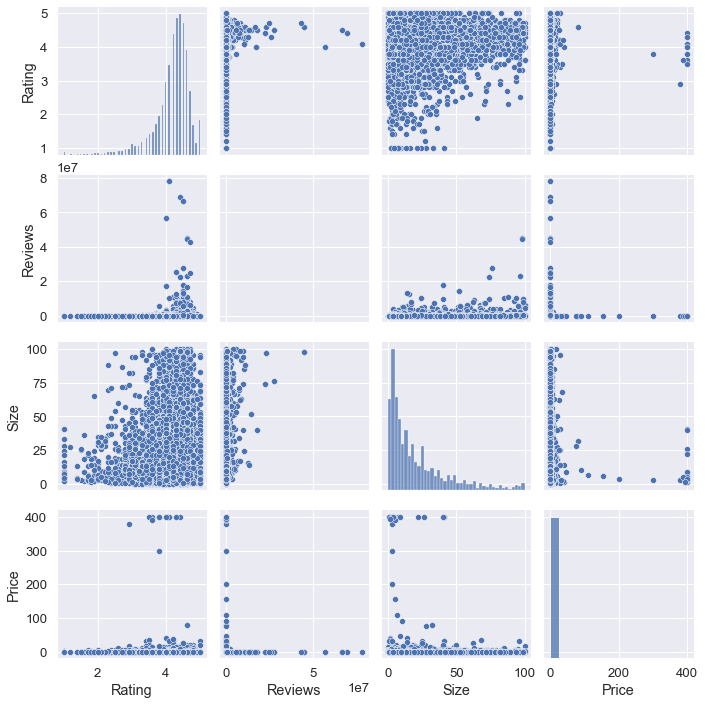

In [117]:
sns.pairplot(df)

as we can see there are no correlation between the columns